Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_200mT_116 ms_slice_1.tif.tiff
SNR: 1.0259070567385, CNR: 0.26335916735414916
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_200mTPhantom.tif
SNR: 14.937569618225098, CNR: -165.7838897705078
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_200mT_116 ms_slice_1.tif.tiff
SNR: 1.2485162253942013, CNR: 0.25652450151483647
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_200mT_116 ms_slice_1.tiff
SNR: 1.0569082663623093, CNR: 0.3318097140301664


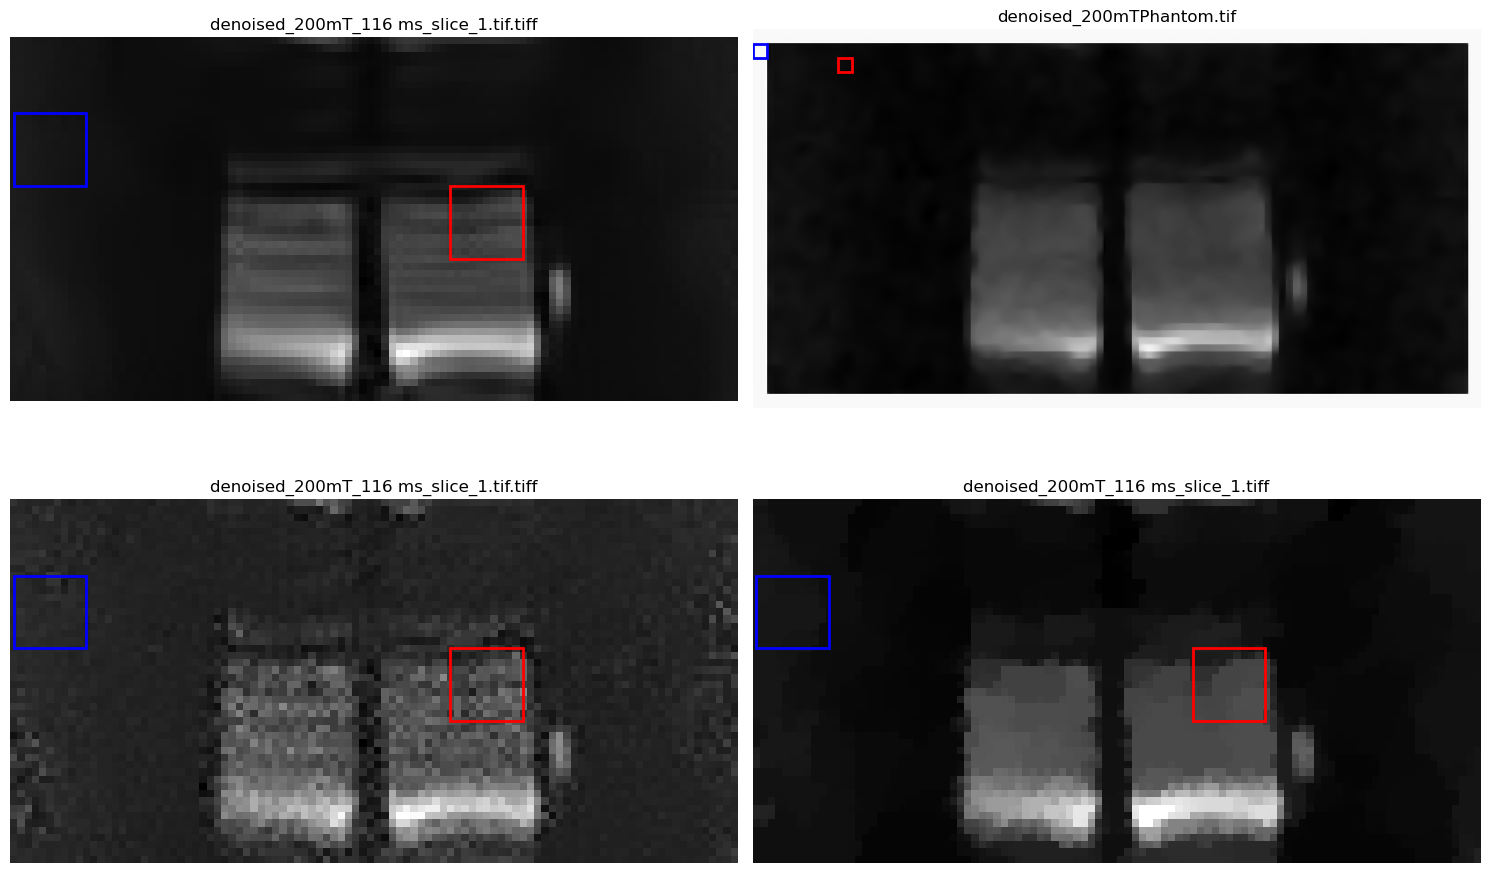

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_200mT_116 ms_slice_1.tif.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_200mTPhantom.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_200mT_116 ms_slice_1.tif.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_200mT_116 ms_slice_1.tiff']


roi_coords = (60, 20, 10, 10)
noise_coords = (0, 10, 10, 10)
roi2_coords = (40,0, 10, 10)  # Example secondary ROI for CNR calculation
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)



In [26]:
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize

# Load the image
image = imread('../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_2mTPhantom.tiff')

# Get the original shape
original_shape = image.shape

# Resize the image to 50 x 100
resized_image = resize(image, (50, 100), anti_aliasing=True)

# Print the original and resized shapes
print(f"Original shape: {original_shape}")
print(f"Resized shape: {resized_image.shape}")

# Save the resized image
imsave('denoised_2mT.tif', resized_image)


Original shape: (268, 515, 1)
Resized shape: (50, 100, 1)


Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_200mT_116 ms_slice_1.tif.tiff
SNR: 0.976962648487435, CNR: 0.25079471668683334
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_200mT.tif
SNR: 59.872005462646484, CNR: 1.948183536529541
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_200mT_116 ms_slice_1.tif.tiff
SNR: 1.1975174944454265, CNR: 0.24604612424713768
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_200mT_116 ms_slice_1.tiff
SNR: 0.9896649459584657, CNR: 0.3106990958017443


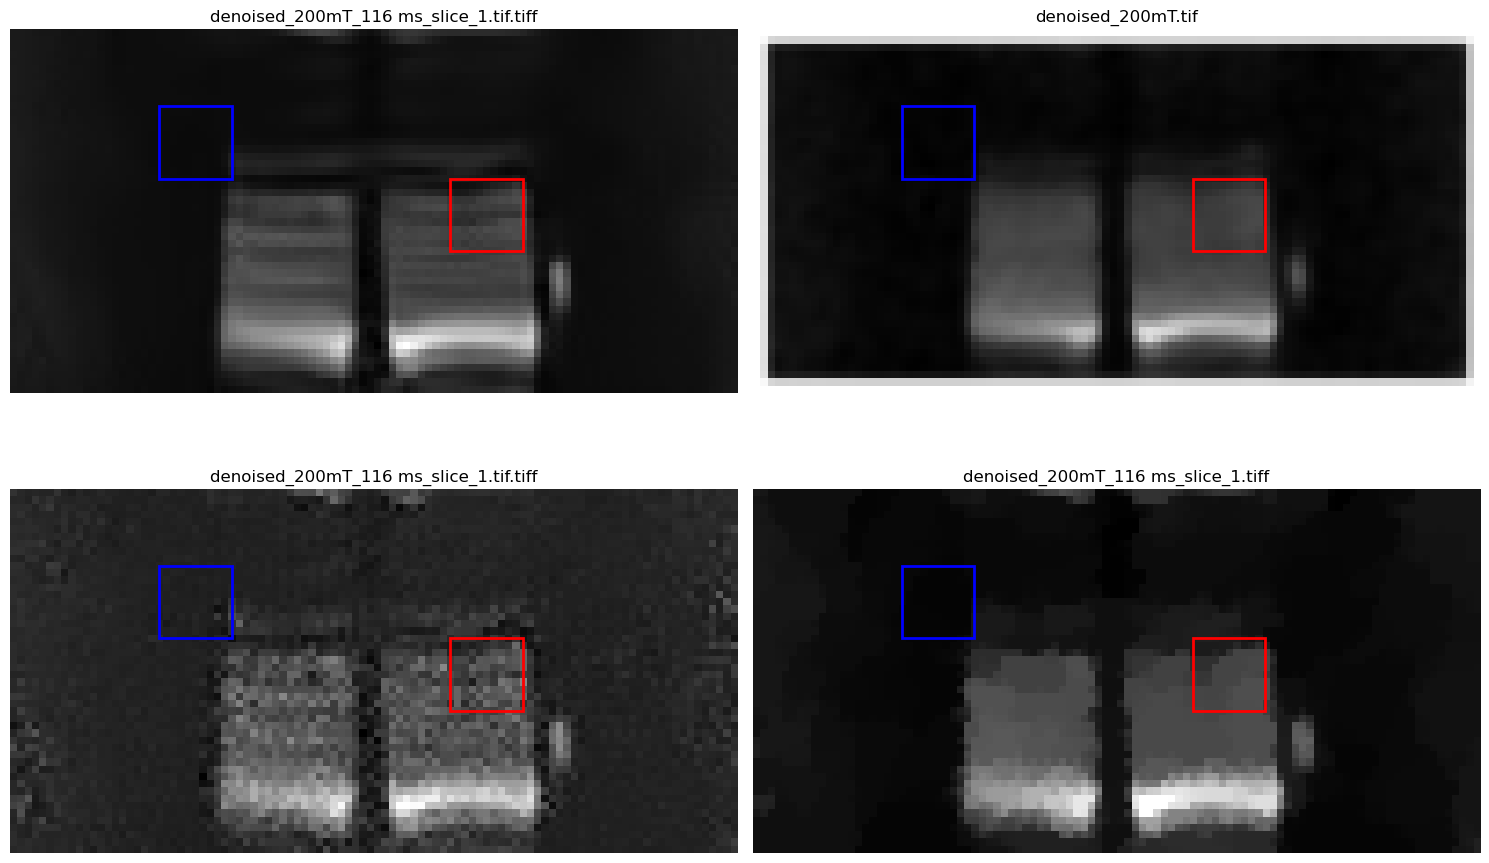

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_200mT_116 ms_slice_1.tif.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_200mT.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_200mT_116 ms_slice_1.tif.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_200mT_116 ms_slice_1.tiff']


roi_coords = (60, 20, 10, 10)
noise_coords = (20, 10, 10, 10)
roi2_coords = (40,0, 10, 10)  # Example secondary ROI for CNR calculation
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_20mT_32 ms_slice_1.tif.tiff
SNR: 1.0120460279555479, CNR: 0.33130325274393957
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_20mT.tif
SNR: 17.492753982543945, CNR: 0.22517791390419006
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/20mT_32 ms_slice_1_denoised.tiff
SNR: 1.0942336964585406, CNR: 0.3368770937100773
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_20mT_32 ms_slice_1.tiff
SNR: 1.0741753290832592, CNR: 0.43136120060740735


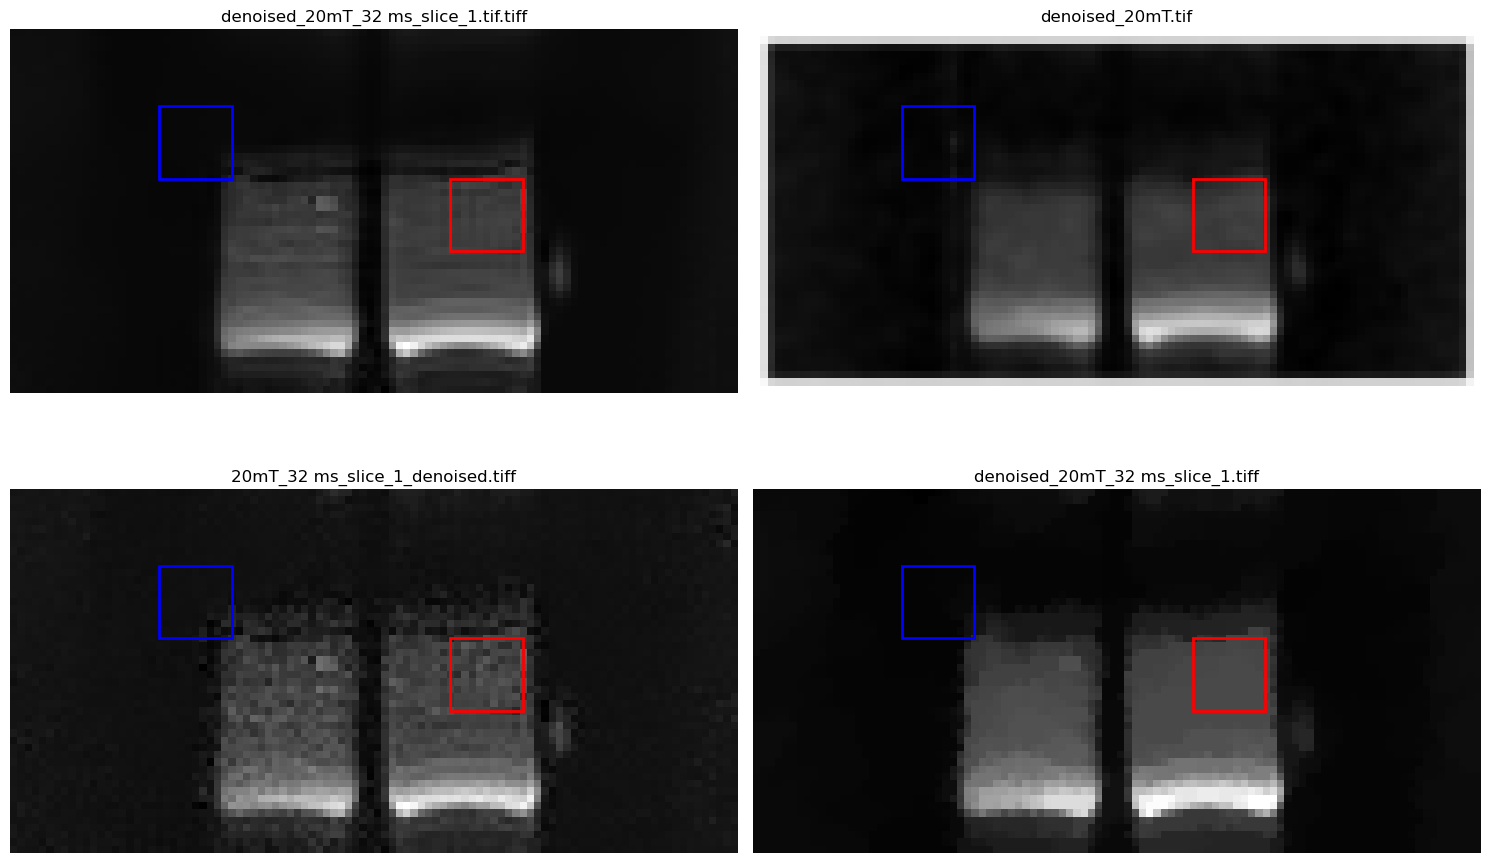

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_20mT_32 ms_slice_1.tif.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_20mT.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/20mT_32 ms_slice_1_denoised.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_20mT_32 ms_slice_1.tiff']


roi_coords = (60, 20, 10, 10)
noise_coords = (20, 10, 10, 10)
roi2_coords = (40,0, 10, 10)  # Example secondary ROI for CNR calculation
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_2mT_131 ms_slice_1.tif.tiff
SNR: 1.1120976938598646, CNR: 0.37942326728491543
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_2mT.tif
SNR: 29.941312789916992, CNR: 0.6352608799934387
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_2mT_131 ms_slice_1.tiff
SNR: 1.0493233692886446, CNR: 0.4279113426642596
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_2mT_131 ms_slice_1.tiff
SNR: 1.0493233692886446, CNR: 0.4279113426642596


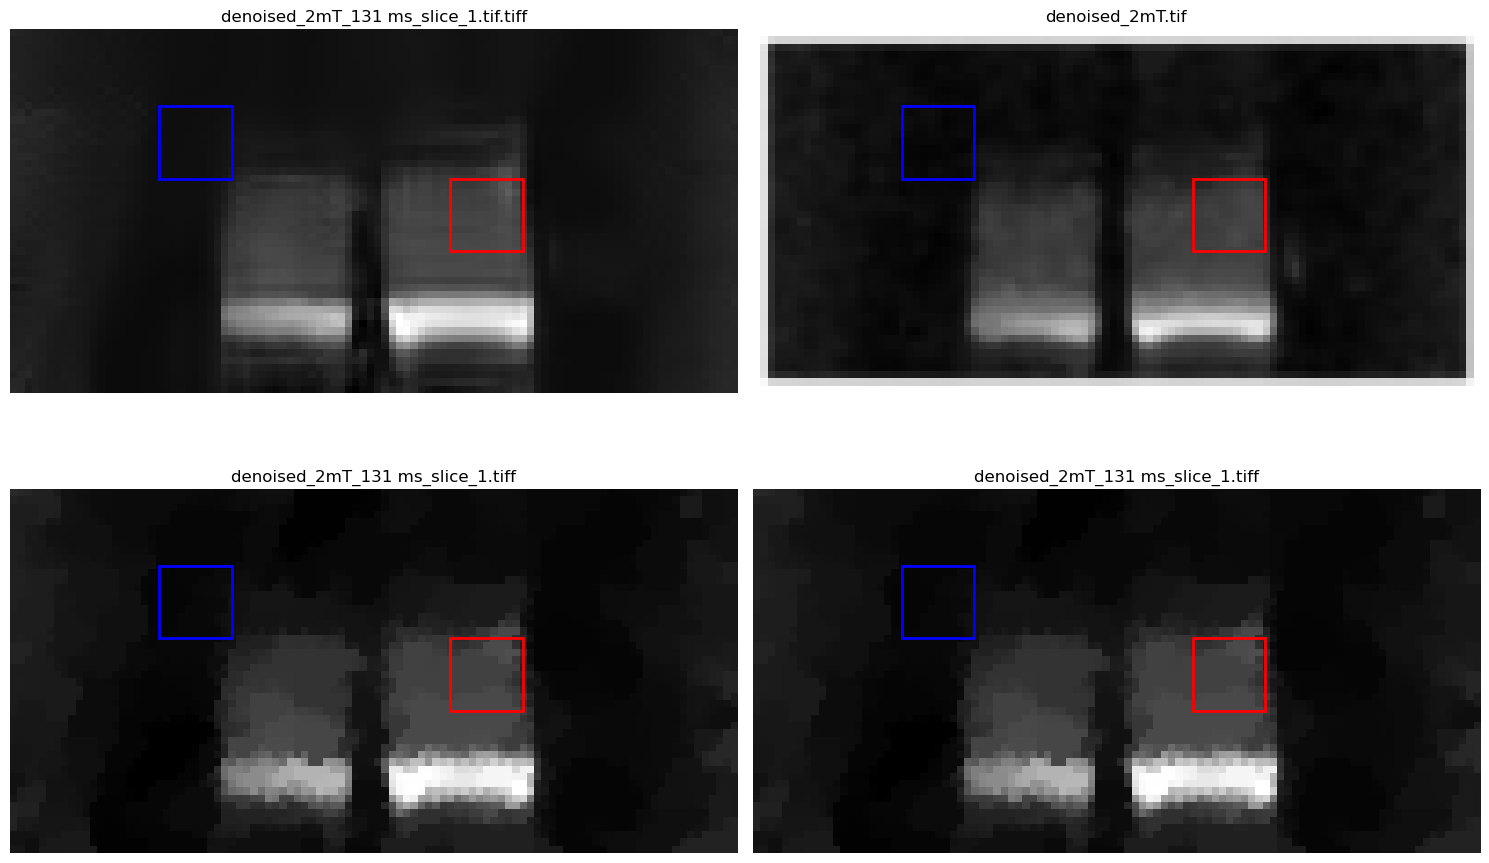

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_2mT_131 ms_slice_1.tif.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_2mT.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_2mT_131 ms_slice_1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_2mT_131 ms_slice_1.tiff']


roi_coords = (60, 20, 10, 10)
noise_coords = (20, 10, 10, 10)
roi2_coords = (40,0, 10, 10)  # Example secondary ROI for CNR calculation
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)

Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_0mT_36 ms_slice_1.tif.tiff
SNR: 1.1397760479588952, CNR: 0.3329541914970869
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_0mT.tif
SNR: 32.80765914916992, CNR: 1.6170803308486938
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_0mT_36 ms_slice_1.tiff
SNR: 1.0199014602216463, CNR: 0.4111612404514543
Image: ../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_0mT_36 ms_slice_1.tiff
SNR: 1.0199014602216463, CNR: 0.4111612404514543


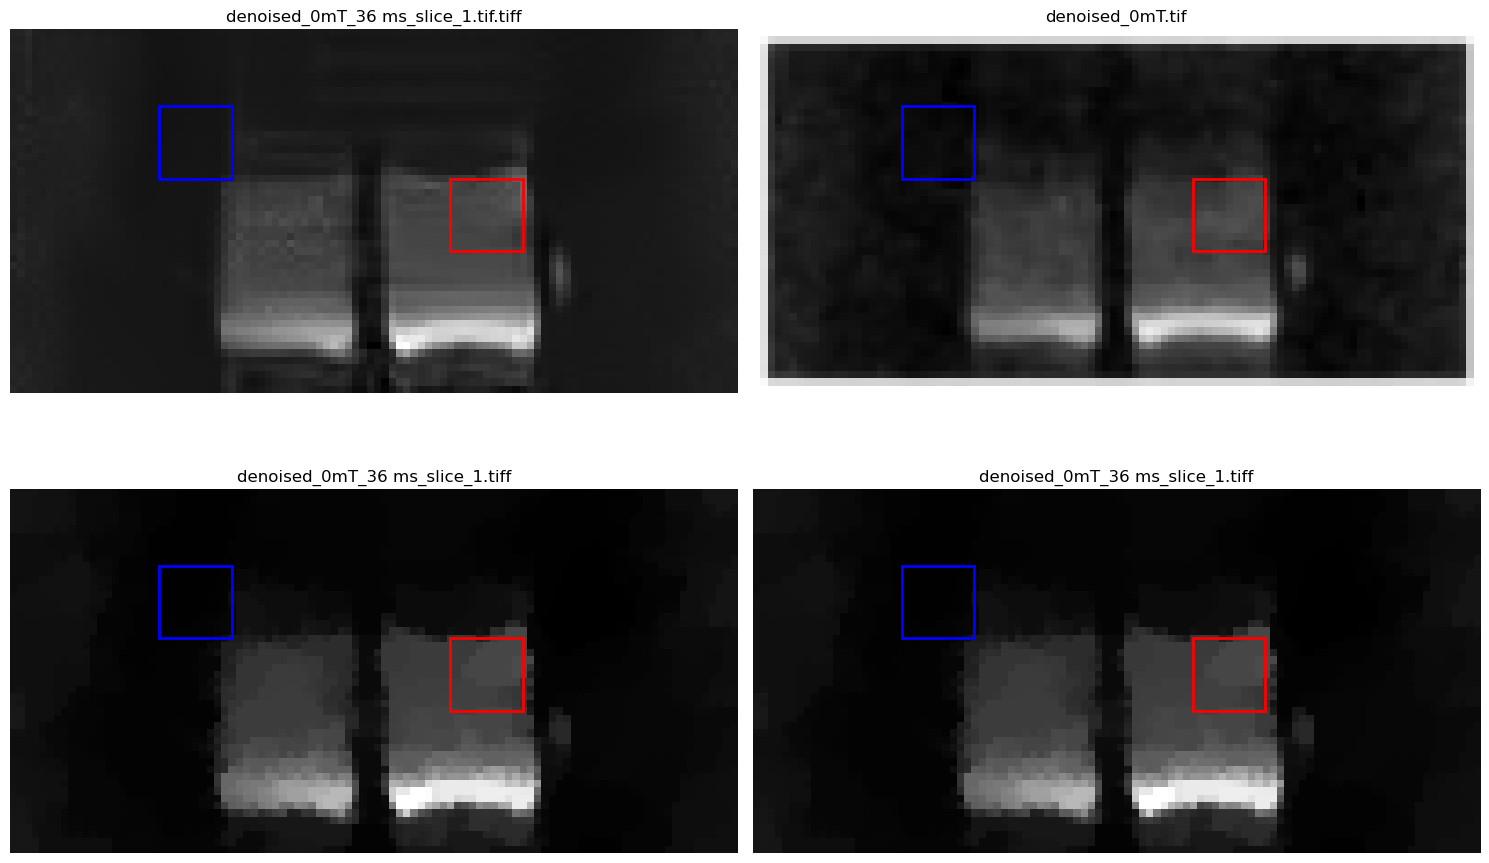

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

def calculate_snr_cnr(image_path, roi_coords, noise_coords, roi2_coords=None):
    """
    Calculate SNR and CNR for a given image.
    
    :param image_path: Path to the image file.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    :param roi2_coords: Coordinates for the second ROI for CNR calculation (optional).
    :return: SNR, CNR (CNR is None if roi2_coords is not provided).
    """
    image = imread(image_path)
    x, y, width, height = roi_coords
    roi_signal = image[y:y+height, x:x+width, :]
    mean_signal = np.mean(roi_signal)
    
    x, y, width, height = noise_coords
    roi_noise = image[y:y+height, x:x+width, :]
    std_noise = np.std(roi_noise)
    
    snr = mean_signal / std_noise if std_noise != 0 else np.inf
    
    cnr = None
    if roi2_coords:
        x, y, width, height = roi2_coords
        roi2_signal = image[y:y+height, x:x+width, :]
        mean_signal2 = np.mean(roi2_signal)
        cnr = (mean_signal - mean_signal2) / std_noise
    
    return snr, cnr

def visualize_all_rois(image_paths, roi_coords, noise_coords):
    """
    Visualize the ROIs on all images in a single figure.
    
    :param image_paths: List of paths to the image files.
    :param roi_coords: Coordinates for the signal ROI (x, y, width, height).
    :param noise_coords: Coordinates for the noise ROI (x, y, width, height).
    """
    num_images = len(image_paths)
    # Calculate the grid size for plotting
    nrows = int(np.ceil(np.sqrt(num_images)))
    ncols = nrows
    
    plt.figure(figsize=(15, nrows * 5))
    
    for i, image_path in enumerate(image_paths, start=1):
        image = imread(image_path)
        plt.subplot(nrows, ncols, i)
        plt.imshow(image[:, :, 0], cmap='gray')  # Assuming we visualize the first channel
        
        
        # Draw the signal ROI
        x, y, width, height = roi_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2))
        
        # Draw the noise ROI
        x, y, width, height = noise_coords
        plt.gca().add_patch(plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2))
        
        # Optional: Set title to the image file name or any identifier
        title = image_path.split('/')[-1]  # Extract the file name as title
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = [
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D/denoised_0mT_36 ms_slice_1.tif.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D/denoised_0mT.tif',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM/denoised_0mT_36 ms_slice_1.tiff',
    '../TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV/denoised_0mT_36 ms_slice_1.tiff']


roi_coords = (60, 20, 10, 10)
noise_coords = (20, 10, 10, 10)
roi2_coords = (40,0, 10, 10)  # Example secondary ROI for CNR calculation
for path in image_paths:
    snr, cnr = calculate_snr_cnr(path, roi_coords, noise_coords, roi2_coords)
    print(f"Image: {path}")
    print(f"SNR: {snr}, CNR: {cnr}")
    
    
    # Assuming image_paths, roi_coords, and noise_coords are already defined
visualize_all_rois(image_paths, roi_coords, noise_coords)